# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [63]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [68]:
def LoadingCSV(filename, delimiter = ',', skipHeader = True):
  
  with open(filename, newline = '') as csvfile:
    lines = list(csv.reader(csvfile, delimiter=delimiter))


  #Skip header if condition is True
  if skipHeader:
    header = lines[0]
    lines = list(lines[1:])

  #Conversion to float
  lines = np.array(lines).astype(float)

  Columns = {}

  #For loop in range(len(header))
  for Index, columnName in enumerate(header):
    Columns[columnName] = lines[:, Index]

  return Columns

def Linear(x, a, b):
  return a*x + b

In [53]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"

Columns = LoadingCSV(filename)

Km =        Columns['km']
Year =      Columns['year']
PowerPS =   Columns['powerPS']
AvgPrice =  Columns['avgPrice']

[125000. 150000.   5000. ...  20000.  10000.  20000.]


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [88]:
#Linear regression of the features
AvgPriceVsKm =    stats.linregress(AvgPrice, Km)
AvgPriceVsYear =  stats.linregress(AvgPrice, Year)
AvgPriceVsPS =    stats.linregress(AvgPrice, PowerPS)

AvgPriceSim = np.linspace(0, 6e4, 1000)

LinearEstimatorKm = Linear(AvgPriceSim, AvgPriceVsKm[0], AvgPriceVsKm[1])
LinearEstimatorYear = Linear(AvgPriceSim, AvgPriceVsYear[0], AvgPriceVsYear[1])
LinearEstimatorPS = Linear(AvgPriceSim, AvgPriceVsPS[0], AvgPriceVsPS[1])


print('Price VS Km: ', AvgPriceVsKm, '\n')
print('Price VS Year: ', AvgPriceVsYear, '\n')
print('Price VS PS: ', AvgPriceVsPS)

Price VS Km:  LinregressResult(slope=-1.2201773569897654, intercept=95550.68562535582, rvalue=-0.2572867429988497, pvalue=4.6897144107235905e-21, stderr=0.12734984599520666, intercept_stderr=1920.7796693539538) 

Price VS Year:  LinregressResult(slope=0.0003034461640728608, intercept=2004.507699790836, rvalue=0.676704316909544, pvalue=2.0722311599129366e-174, stderr=9.174365005204193e-06, intercept_stderr=0.13837420566564226) 

Price VS PS:  LinregressResult(slope=0.005557828639016384, intercept=82.37429185361741, rvalue=0.7085500315263967, pvalue=2.6708763984331714e-198, stderr=0.00015381390679116108, intercept_stderr=2.319929189702251)


In [ ]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# your code.....

Text(0.5, 1.0, 'AvgPrice VS Year')

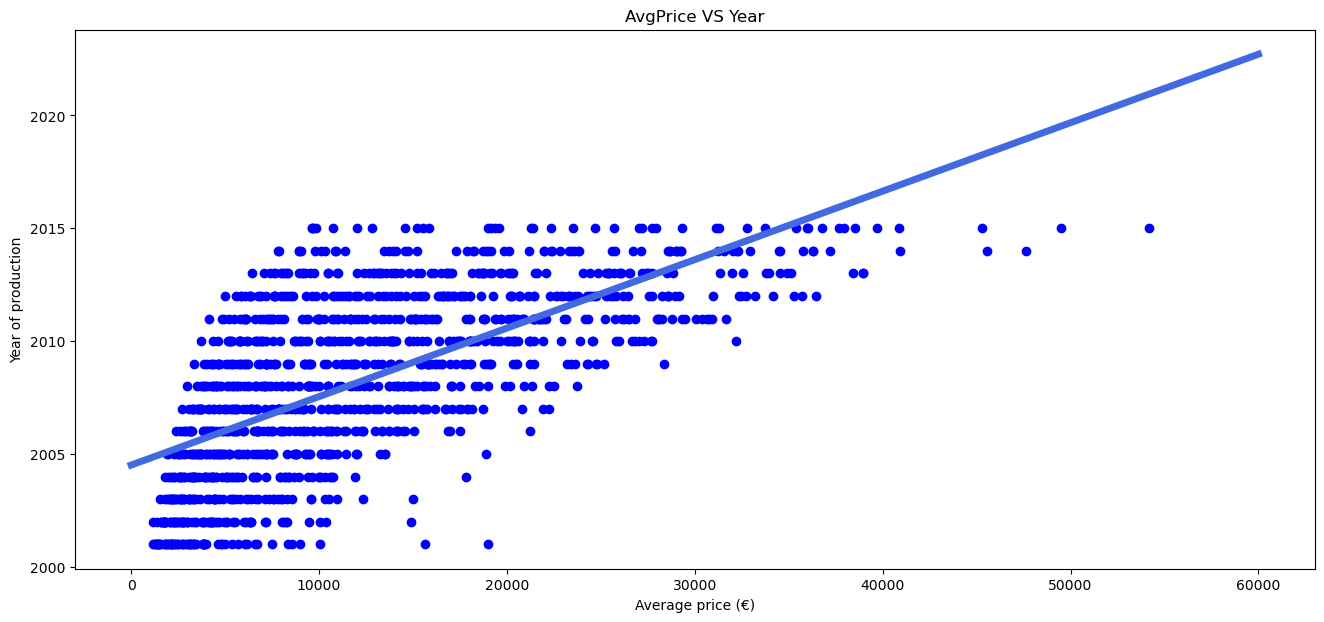

In [83]:
fig, axs = plt.subplots(1, 1, figsize=(16, 7))

axs.scatter(AvgPrice, Year, c = 'blue', label='AvgPriceVsYear')

axs.plot(AvgPriceSim, LinearEstimatorYear, color = 'royalblue', lw = 5)

axs.set_xlabel('Average price (€)')
axs.set_ylabel('Year of production')
axs.set_title("AvgPrice VS Year")


Text(0.5, 1.0, 'AvgPrice VS Km')

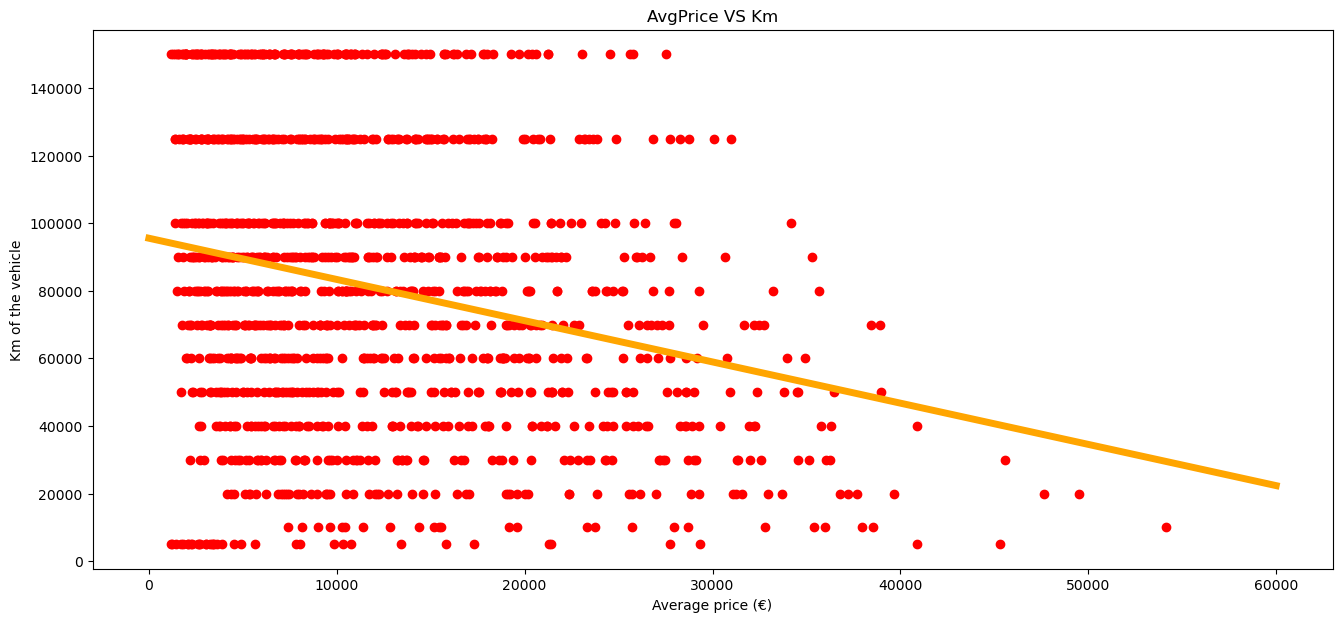

In [84]:
fig, axs = plt.subplots(1, 1, figsize=(16, 7))

axs.scatter(AvgPrice, Km, c = 'red', label='AvgPriceVsKm')
axs.plot(AvgPriceSim, LinearEstimatorKm, color = 'orange', lw = 5)

axs.set_xlabel('Average price (€)')
axs.set_ylabel('Km of the vehicle')
axs.set_title("AvgPrice VS Km")


Text(0.5, 1.0, 'AvgPrice VS Power')

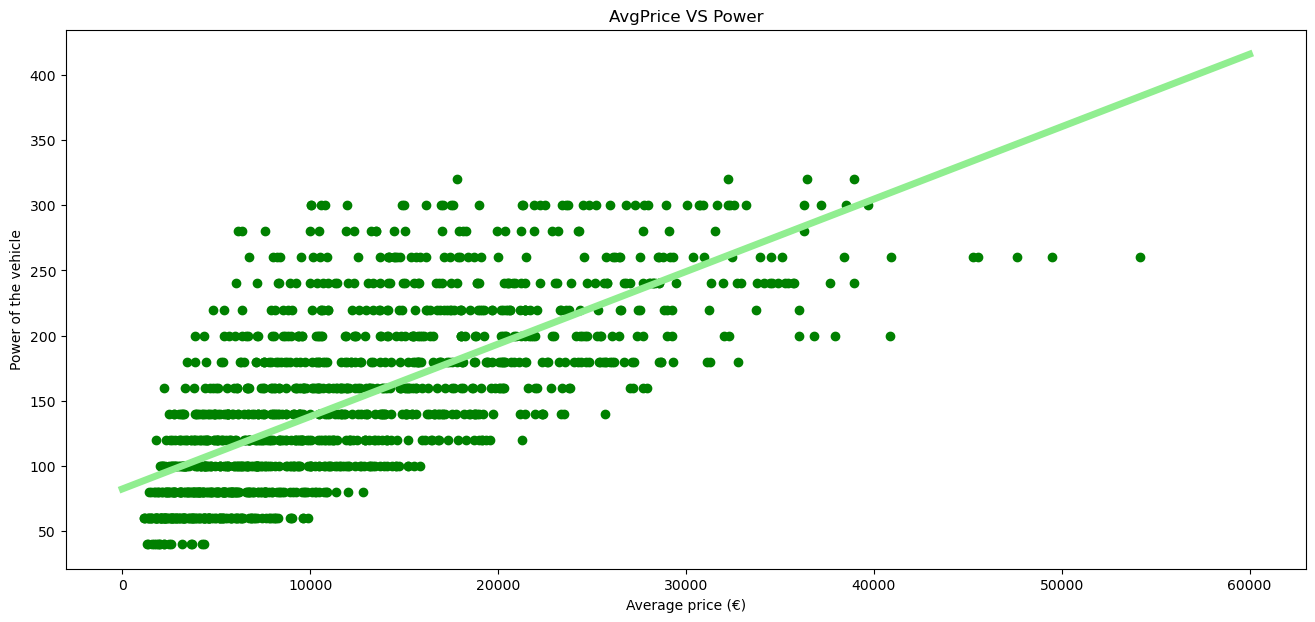

In [85]:
fig, axs = plt.subplots(1, 1, figsize=(16, 7))

axs.scatter(AvgPrice, PowerPS, c = 'green', label='AvgPriceVsKm')
axs.plot(AvgPriceSim, LinearEstimatorPS, color = 'lightgreen', lw = 5)

axs.set_xlabel('Average price (€)')
axs.set_ylabel('Power of the vehicle')
axs.set_title("AvgPrice VS Power")


In [ ]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
